# Imports for the notebook

In [56]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', None)

# Data exploration

SalePrice    394931.06
Name: 0.98, dtype: float64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


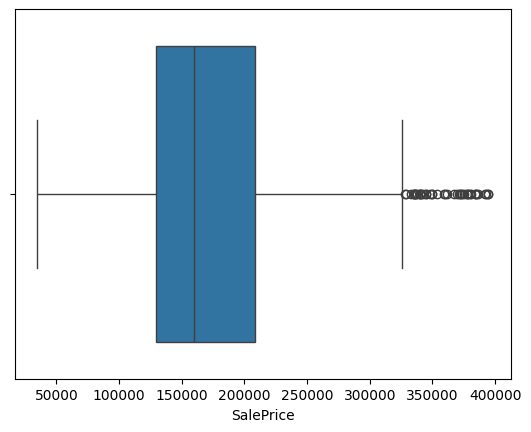

In [39]:
df_housing = pd.read_csv("./data/train.csv") 
# Delete id 
sns.boxplot(x= df_housing[df_housing["SalePrice"]<394931]["SalePrice"])

df_housing = df_housing.drop(columns=['Id'])
# to use the relevant housing data we limit the range wich we will gather the sales data so we will use the 98% percentile
print(df_housing[["SalePrice"]].quantile(0.98))
df_housing[df_housing["SalePrice"]<394931]
df_housing

In [4]:
threshold = 0.8

corr_matrix = df_housing.select_dtypes(include=['number']).corr(method="spearman")
# Vuelve el triangulo inferior de la matriz en 0, desde el k = 1 que seria la columna de el triangulo superior, excluyendo la diagonal principal (k=1),
mask = np.tril(corr_matrix, k=-1)

df_triangle = pd.DataFrame(mask, index=corr_matrix.index, columns=corr_matrix.columns)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

df_triangle = df_triangle.where(corr_matrix.abs()>=threshold,0)
df_triangle.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LotFrontage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LotArea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OverallQual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OverallCond,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
corr_matrix.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
corr_matrix["SalePrice"].sort_values(kind="quicksort",ascending=False, key=abs)

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
EnclosedPorch   -0.218394
BsmtUnfSF        0.185197
KitchenAbvGr    -0.164826
OverallCond     -0.129325
ScreenPorch      0.100070
MoSold           0.069432
LowQualFinSF    -0.067719
3SsnPorch        0.065440
MiscVal         -0.062727
PoolArea         0.058453
BsmtFinSF2      -0.038806
YrSold          -0.029899
BsmtHalfBath    -0.012189
MSSubClass       0.007192
Name: SalePrice, dtype: float64

et the variables with the highest coorelations  vllm. 

In [5]:
unstacked = df_triangle.unstack().sort_values(kind="quicksort",ascending=False)

# Se hace un filtrado por todos los que son menores a 0.01

unstacked = unstacked[unstacked>0.01]
#iloc[0]

In [6]:
unstacked

YearBuilt    GarageYrBlt     0.890546
GarageCars   GarageArea      0.853317
TotalBsmtSF  1stFlrSF        0.829292
GrLivArea    TotRmsAbvGrd    0.827874
OverallQual  SalePrice       0.809829
dtype: float64

Se tiene que en general, cuando dos variables tienen valores muy altos se tiene colinealidad, y eso puede representar problemas para modelos los cuales sufran con este fenomeno, por ejemplo la regresion lineal, pero los modelos basados en arboles que son lo que se tienen planeados de utilizar, en general no sufren demaciado con esta caracteristica, pero igual teniendo en cuenta que la correlacion de relaciones no necesariamente lineales que es lo que nos ayuda calcular spearman estan tan altas lo que sucedera si le metemos estas variables es probablemente redundancia, por ende todo lo que tenga una correlacion de mas de 0.8, se tiene la hipotesis que para efectos logicos aunque no haga genere en general problemas no va a terminar mejorando o empeorando el modelo.

<Axes: >

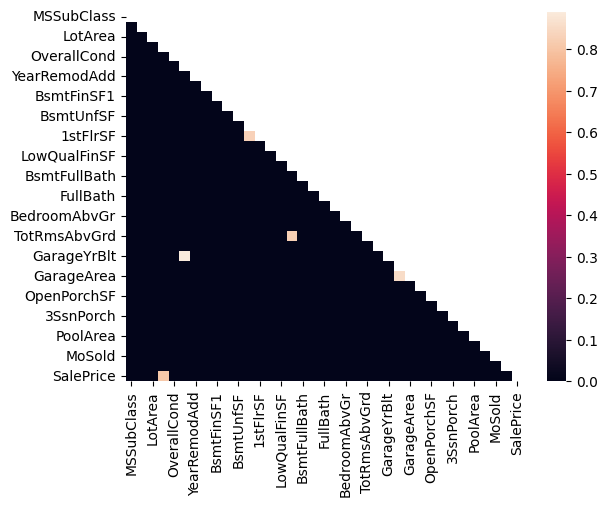

In [7]:
sns.heatmap(df_triangle ,mask=mask) #

In [28]:
df_housing[["SalePrice"]].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [35]:
df_housing.shape

(1460, 80)

In [34]:
len(df_housing[df_housing["SalePrice"]>394931])

30

## Variable clearning 

In [59]:
df_housing.select_dtypes(include=["object"]).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
string_columns = df_housing.select_dtypes(include=["object"]).columns
use = []
not_in = []
for column in string_columns: 
    worthy = df_housing[column].value_counts(normalize=True).max()<=0.70
    if worthy:
        use.append(column)
        print(worthy)
        print(f"{df_housing[column].value_counts(normalize=True)}\n") 
    else: 
        not_in.append(column)


True
Alley
Grvl    0.549451
Pave    0.450549
Name: proportion, dtype: float64

True
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64

True
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
SWISU      0.017123
StoneBr    0.017123
Blmngtn    0.011644
MeadowV    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: proportion, dtype: float64

True
HouseStyle
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: proportion, dtype: float64

True
Exterior1st
VinylSd    0.352740
HdBoard    0.15205

In [98]:
print(f"Numero de variables object a usar {len(use)} Numero de variables object para no usar {len(not_in)}")

Numero de variables object a usar 18 Numero de variables object para no usar 25


In [99]:
# Despues de estos se revisa cuantas variables de las que tenemos presentes son las que podemos usar 
use

['Alley',
 'LotShape',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'PoolQC',
 'Fence']

In [ ]:
# Esta es una variable complicada que despues trataremos dado que usualmente para las variables geograficas prefiero optar por un enfoque basado en grafos, por ende por ahora no se usara.
string_variables_to_not_use = ['Neighborhood'] 

## One Hot Encoding

In [97]:
string_variables_to_use = ['Alley', 'LotShape', "HouseStyle",'Exterior1st', 'Exterior2nd',"ExterQual", "Foundation","BsmtQual","BsmtExposure","BsmtFinType1","HeatingQC","KitchenQual","BsmtQual", "FireplaceQu","GarageType"'GarageFinish','PoolQC','Fence']

In [68]:
df_housing.select_dtypes(include=["object"]).value_counts(normalize=True)

Series([], Name: proportion, dtype: float64)

In [65]:
frecuency_count

<bound method DataFrame.value_counts of      MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave   NaN      Reg         Lvl    AllPub    Inside  

In [57]:
df_housing.dtypes.sort_values()

MSSubClass         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
BsmtFinSF2         int64
BsmtFinSF1         int64
SalePrice          int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
LotFrontage      float64
MasVnrArea       float64
GarageYrBlt      float64
BsmtQual          object
GarageFinish      object
Neighborhood      object


# Model training

In [43]:
X = df_housing.drop(columns=["SalePrice"])
Y = df_housing["SalePrice"]

In [48]:
len(Y)

1460

In [47]:
len(X)

1460

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2) # ,stratify= ["SalePrice"]

In [50]:
x_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1333,50,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
397,60,RL,69.0,7590,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
167,60,RL,86.0,10562,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2007,New,Partial
665,60,RL,106.0,11194,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal
20,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,11,2006,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,60,RL,NaN,9636,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
143,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1207,20,RL,70.0,9135,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
298,60,RL,90.0,11700,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
